In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from tabulate import tabulate

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import t, f
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

In [3]:
origin = read_excel("https://data.hossam.kr/mldata/fish.xlsx")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Í∏∏Ïù¥      56 non-null     float64
 1   ÎÜíÏù¥      56 non-null     float64
 2   ÎëêÍªò      56 non-null     float64
 3   Î¨¥Í≤å      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB
None


Í∏∏Ïù¥    ÎÜíÏù¥    ÎëêÍªò    Î¨¥Í≤å
0   8.4  2.11  1.41   5.9
1  13.7  3.53  2.00  32.0
2  15.0  3.82  2.43  40.0
3  16.2  4.59  2.63  51.5
4  17.4  4.59  2.94  70.0

['Í∏∏Ïù¥', 'ÎÜíÏù¥', 'ÎëêÍªò']
[ÌõàÎ†®Í≤∞Í≥º ÏãúÍ∞ÅÌôî]


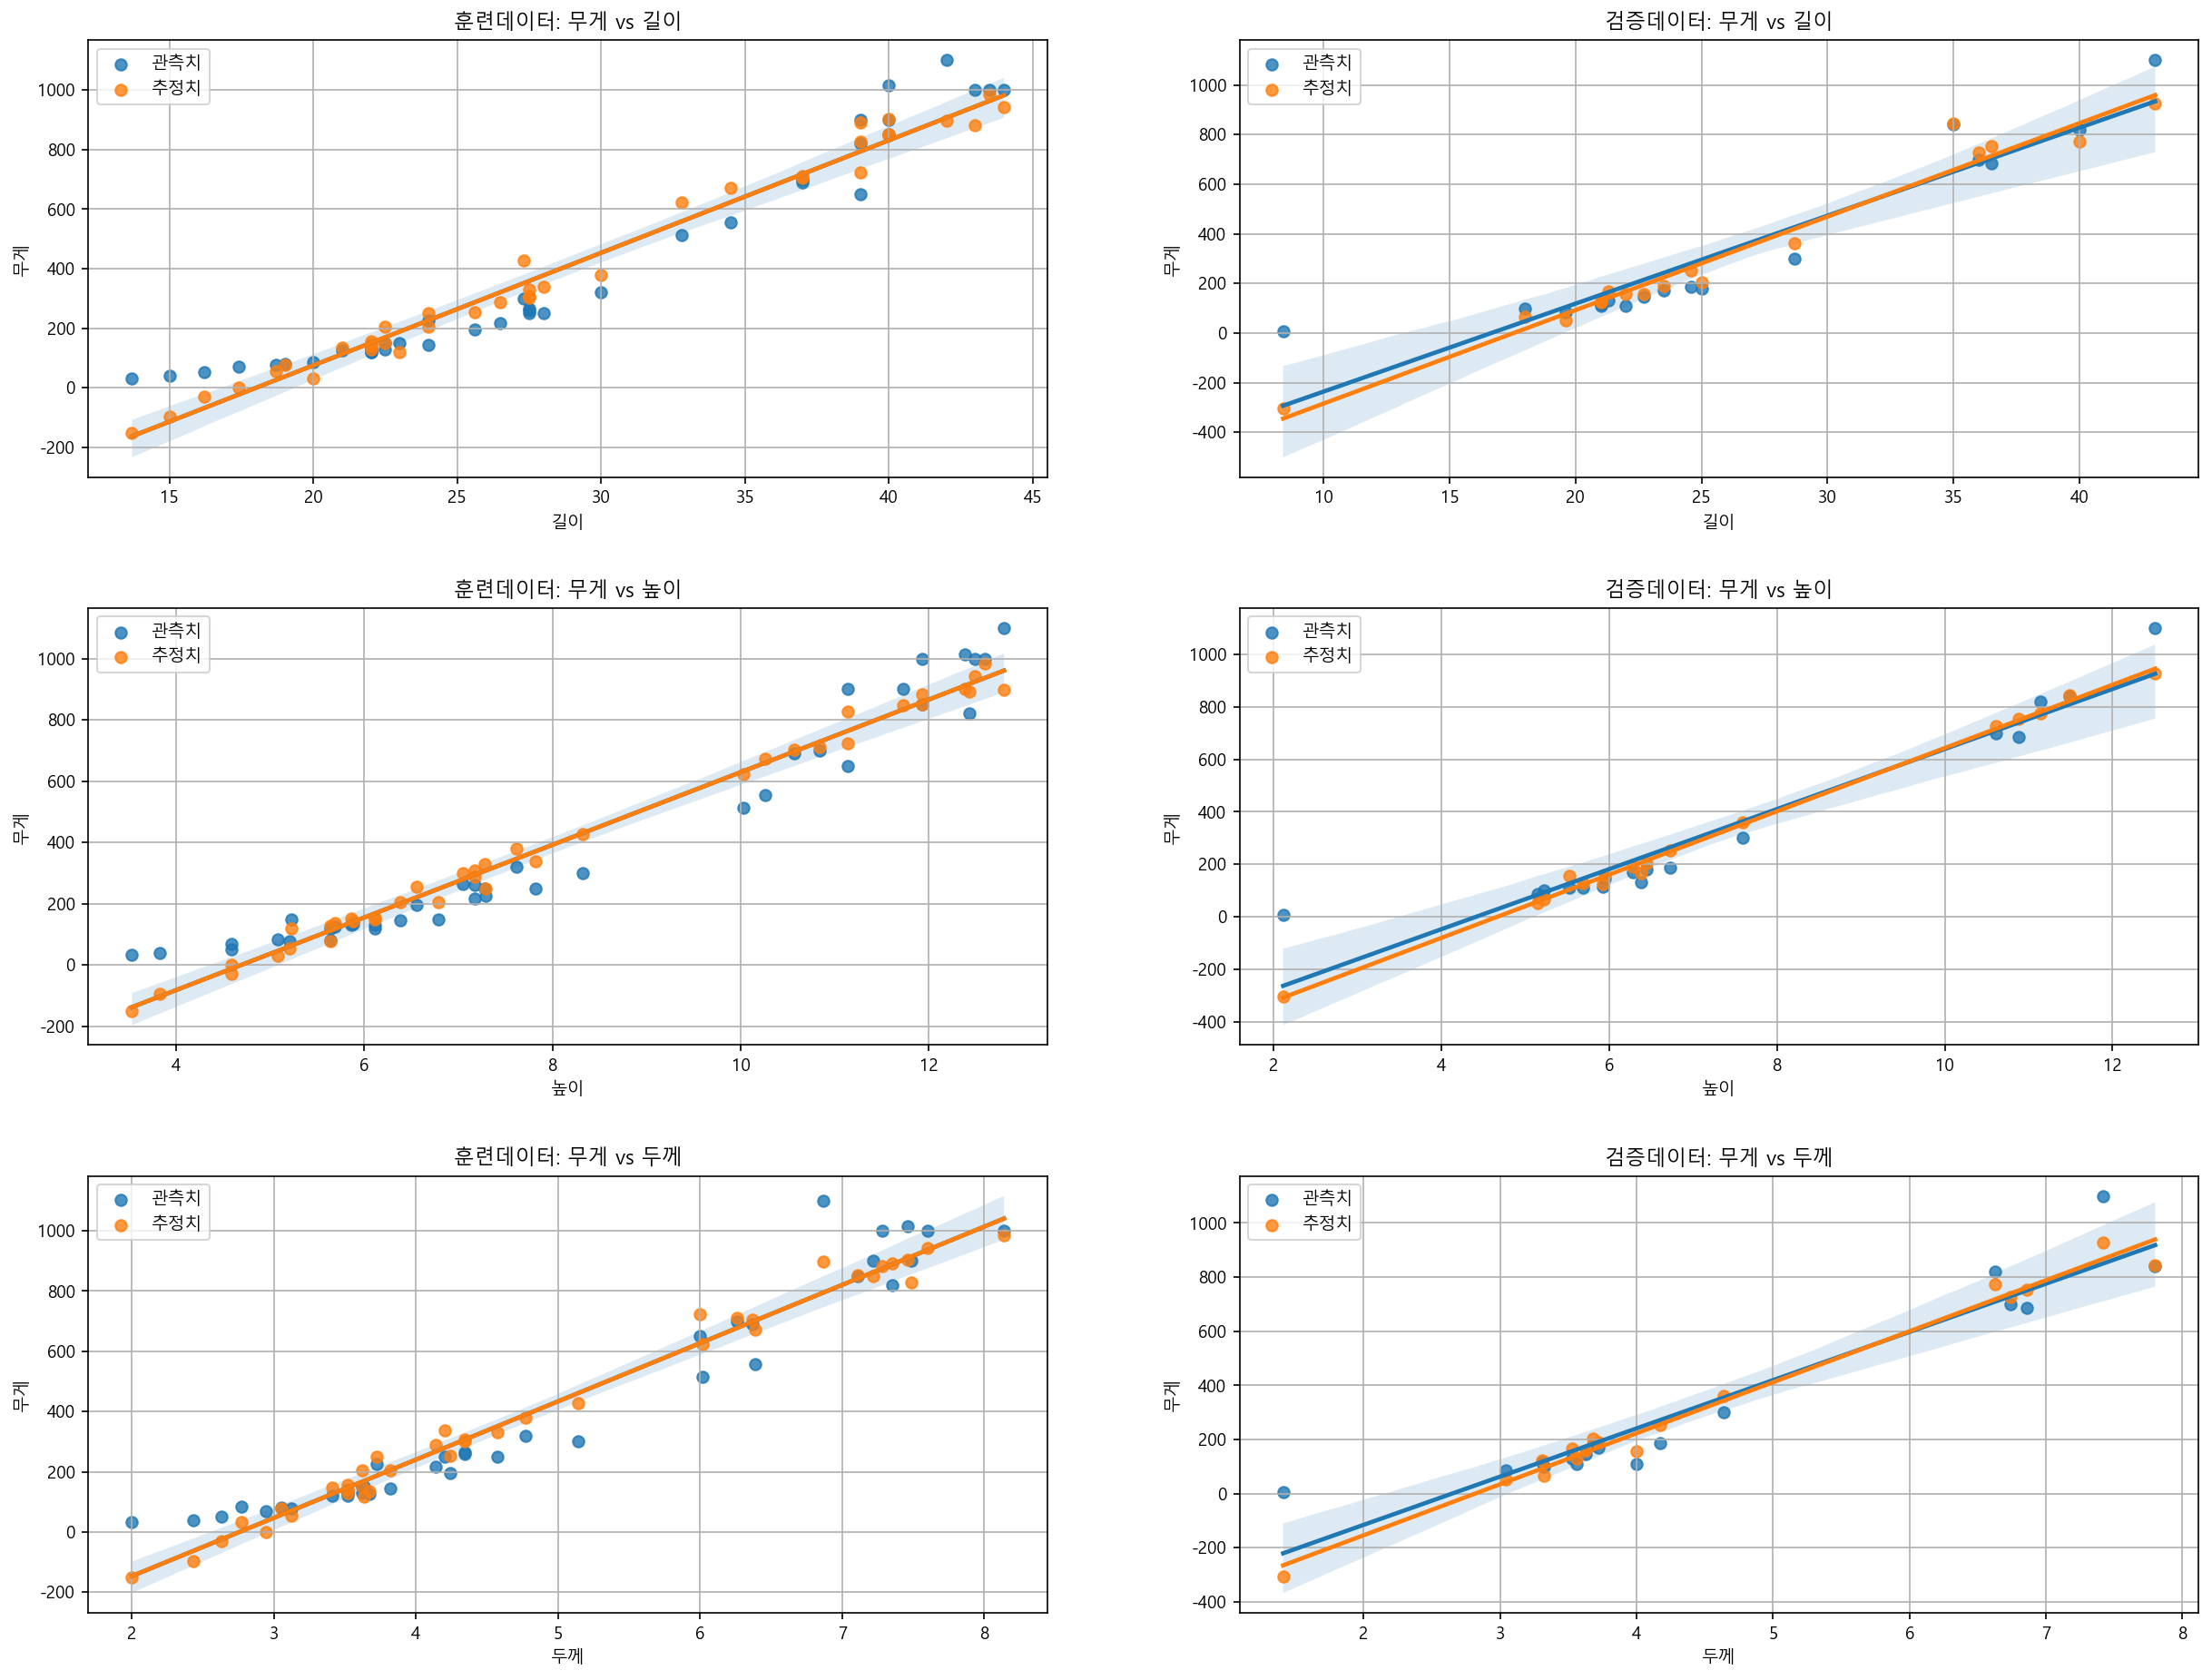

[ÏÑ±Îä•ÏßÄÌëú]
+-------------------------------+--------------+--------------+
|                               |   ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |   Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |
|-------------------------------+--------------+--------------|
| Í≤∞Ï†ïÍ≥ÑÏàò(R2)                  |     0.949944 |     0.919246 |
| ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)             |      61.8824 |      58.2871 |
| ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)             |      6089.38 |      8828.88 |
| ÌèâÍ∑†Ïò§Ï∞®(RMSE)                |      78.0345 |      93.9621 |
| ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |      46.2303 |       327.91 |
| ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)           |      22.7633 |      304.702 |
+-------------------------------+--------------+--------------+

[ÌöåÍ∑ÄÏãù]
Î¨¥Í≤å = 6.182 * Í∏∏Ïù¥ + 57.255 * ÎÜíÏù¥ + 70.281 * ÎëêÍªò + -577.582

[ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ≥¥Í≥†]
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | Ï¢ÖÏÜçÎ≥ÄÏàò   | ÎèÖÎ¶ΩÎ≥ÄÏàò   |   B(ÎπÑÌëúÏ§ÄÌô

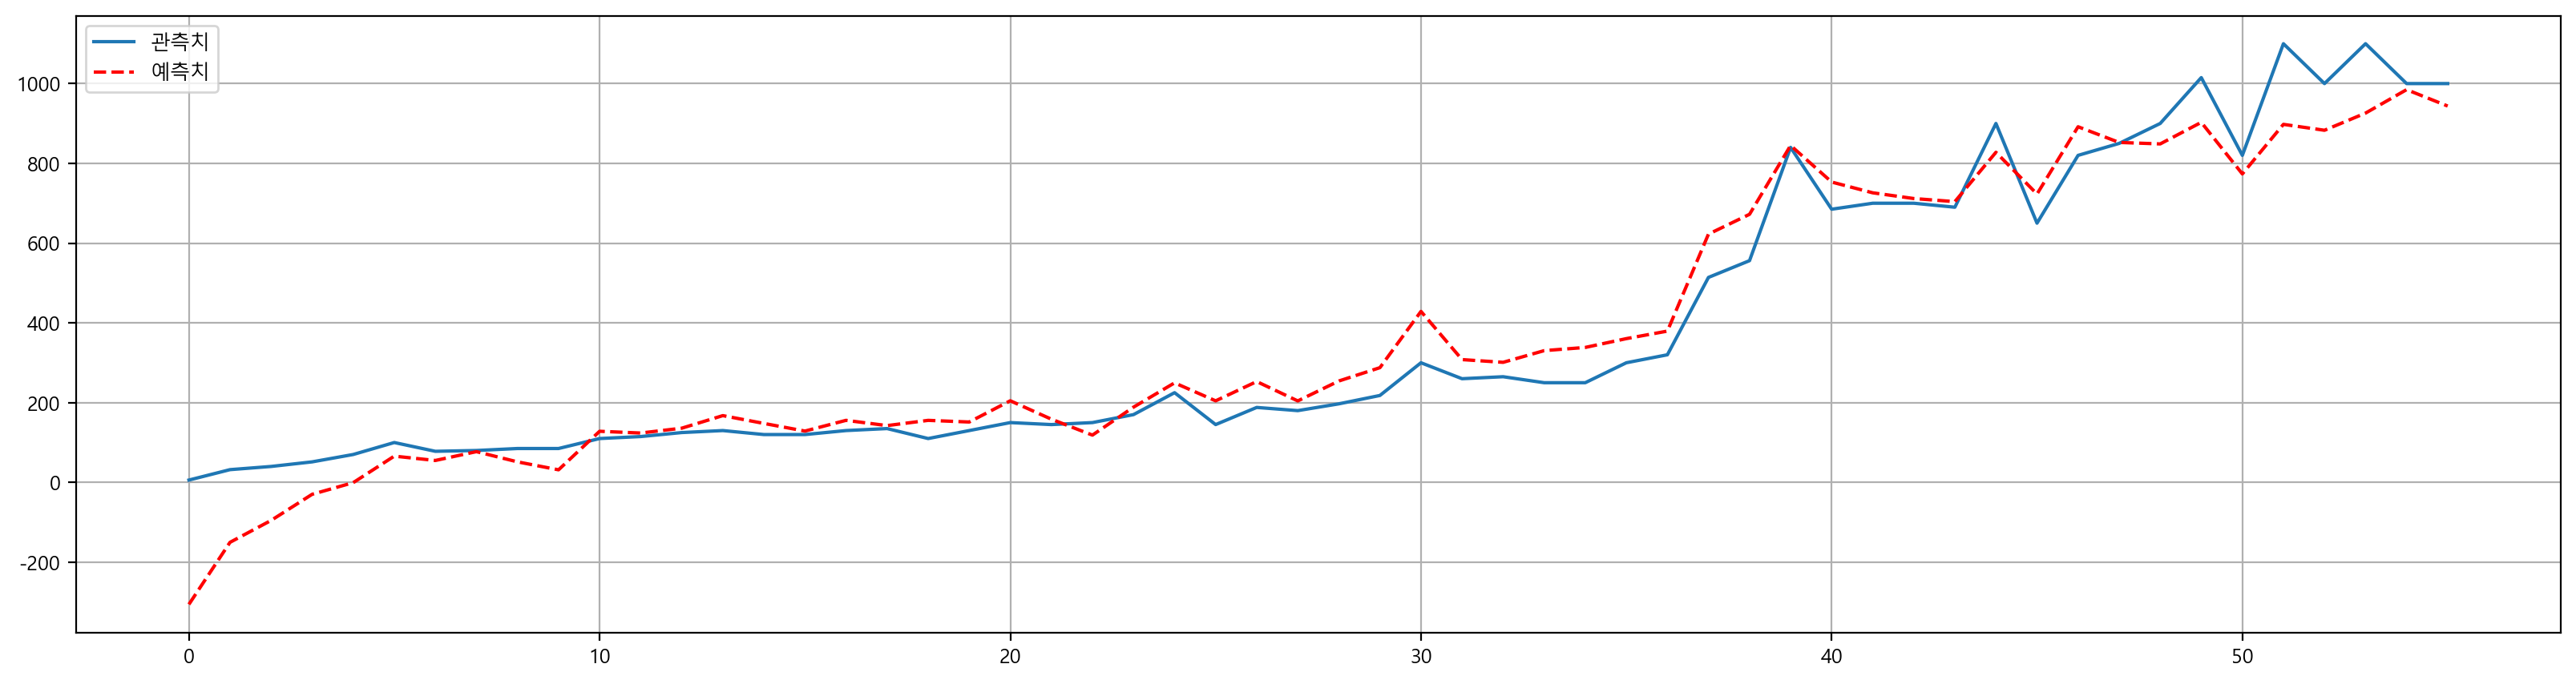

In [4]:
# Ï†úÏô∏Ìï† ÌïÑÎìú Ïù¥Î¶Ñ. Ï≤´ Î≤àÏß∏ ÏõêÏÜåÏóêÎäî yÍ∞íÏù¥ Îì§Ïñ¥Í∞ÄÏïº Ìï®
ignore_list = ['Î¨¥Í≤å']

for ignore in range(0, len(ignore_list)):
    yname = ignore_list[0]
    x = origin.drop(ignore_list[:ignore+1], axis=1)
    y = origin[yname]
    xnames = list(x.columns)
    print(xnames)
    #continue

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
    x_train.shape, x_test.shape, y_train.shape, y_test.shape

    # --------------------------------
    # ÌöåÍ∑ÄÎ∂ÑÏÑù
    # --------------------------------
    # Î∂ÑÏÑùÎ™®Îç∏ ÏÉùÏÑ±
    model = LinearRegression()
    fit = model.fit(x_train, y_train)

    # --------------------------------
    # ÌõàÎ†®, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°Ïπò
    # --------------------------------
    y_train_pred = fit.predict(x_train)
    y_test_pred = fit.predict(x_test)

    # Î∞òÎ≥µ ÏàòÌñâÏùÑ ÏúÑÌï¥ ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÎ°ú Î¨∂Ïùå
    target = [[x_train, y_train, y_train_pred], [x_test, y_test, y_test_pred]]

    # ÏÑ±Îä•ÏßÄÌëú Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
    result_data = []

    # --------------------------------
    # ÏãúÍ∞ÅÌôî Î∞è ÏÑ±Îä•ÏßÄÌëú Í≥ÑÏÇ∞
    # --------------------------------
    # ÏãúÍ∞ÅÌôî ÏãúÏûë
    print("[ÌõàÎ†®Í≤∞Í≥º ÏãúÍ∞ÅÌôî]")
    size = len(xnames)
    
    fig, ax = plt.subplots(len(xnames), 2, figsize=(20, 5*size), dpi=150)
    fig.subplots_adjust(hspace=0.3)

    for i, v in enumerate(target):
        result = {
            "Í≤∞Ï†ïÍ≥ÑÏàò(R2)": r2_score(v[1], v[2]),
            "ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)": mean_absolute_error(v[1], v[2]),
            "ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)": mean_squared_error(v[1], v[2]),
            "ÌèâÍ∑†Ïò§Ï∞®(RMSE)": np.sqrt(mean_squared_error(v[1], v[2])),
            "ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE)": np.mean(np.abs((v[1] - v[2]) / v[1]) * 100),
            "ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)": np.mean((v[1] - v[2]) / v[1] * 100)
        }
        
        result_data.append(result)
        
        for j, w in enumerate(xnames):
            sb.regplot(x=v[0][w], y=v[1], ci=95, ax=ax[j][i], label='Í¥ÄÏ∏°Ïπò')
            sb.regplot(x=v[0][w], y=v[2], ci=0, ax=ax[j][i], label='Ï∂îÏ†ïÏπò')
            ax[j][i].set_title(f"ÌõàÎ†®Îç∞Ïù¥ÌÑ∞: {yname} vs {w}" if i == 0 else f"Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞: {yname} vs {w}")
            ax[j][i].legend()
            ax[j][i].grid(True)

    plt.show()
    plt.close()

    result_df = DataFrame(result_data, index=["ÌõàÎ†®Îç∞Ïù¥ÌÑ∞", "Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞"])
    print("[ÏÑ±Îä•ÏßÄÌëú]")
    print(tabulate(result_df.T, headers='keys', tablefmt='psql', showindex=True, numalign="right"), end="\n\n")

    # --------------------------------
    # ÌöåÍ∑ÄÏãù
    # --------------------------------
    expr = "{yname} = ".format(yname=yname)

    for i, v in enumerate(xnames):
        expr += "%0.3f * %s + " % (fit.coef_[i], v)

    expr += "%0.3f" % fit.intercept_
    print("[ÌöåÍ∑ÄÏãù]")
    print(expr, end="\n\n")

    # --------------------------------
    # Í≤∞Í≥ºÎ≥¥Í≥†
    # --------------------------------
    for i, v in enumerate(target):
        print("[ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê" if i == 0 else "[Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Ïóê", "ÎåÄÌïú Í≤∞Í≥ºÎ≥¥Í≥†]")
        
        target_x = v[0]
        target_y = v[1]
        target_y_pred = v[2]
        
        # ÏûîÏ∞®
        resid = target_y - target_y_pred

        # Ï†àÌé∏Í≥º Í≥ÑÏàòÎ•º ÌïòÎÇòÏùò Î∞∞Ïó¥Î°ú Í≤∞Ìï©
        params = np.append(fit.intercept_, fit.coef_)

        # Í≤ÄÏ¶ùÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏóê ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
        design_x = target_x.copy()
        design_x.insert(0, 'ÏÉÅÏàò', 1)

        dot = np.dot(design_x.T,design_x)   # ÌñâÎ†¨Í≥±
        inv = np.linalg.inv(dot)            # Ïó≠ÌñâÎ†¨
        dia = inv.diagonal()                # ÎåÄÍ∞ÅÏõêÏÜå

        # Ï†úÍ≥±Ïò§Ï∞®
        MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

        se_b = np.sqrt(MSE * dia)           # ÌëúÏ§ÄÏò§Ï∞®
        ts_b = params / se_b                # tÍ∞í

        # Í∞Å ÎèÖÎ¶ΩÏàòÏóê ÎåÄÌïú pvalue
        p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

        # VIF
        vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for i, v in enumerate(target_x.columns)]

        # ÌëúÏ§ÄÌôî Í≥ÑÏàò
        train_df = target_x.copy()
        train_df[target_y.name] = target_y
        scaler = StandardScaler()
        std = scaler.fit_transform(train_df)
        std_df = DataFrame(std, columns=train_df.columns)
        std_x = std_df[xnames]
        std_y = std_df[yname]
        std_model = LinearRegression()
        std_fit = std_model.fit(std_x, std_y)
        beta = std_fit.coef_

        # Í≤∞Í≥ºÌëú Íµ¨ÏÑ±ÌïòÍ∏∞
        result_df = DataFrame({
            "Ï¢ÖÏÜçÎ≥ÄÏàò": [yname] * len(xnames),
            "ÎèÖÎ¶ΩÎ≥ÄÏàò": xnames,
            "B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(params[1:], 4),
            "ÌëúÏ§ÄÏò§Ï∞®": np.round(se_b[1:], 3),
            "Œ≤(ÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(beta, 3),
            "t": np.round(ts_b[1:], 3),
            "Ïú†ÏùòÌôïÎ•†": np.round(p_values[1:], 3),
            "VIF": vif,
        })

        #result_df
        print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

        resid = target_y - target_y_pred        # ÏûîÏ∞®
        dw = durbin_watson(resid)               # ÎçîÎπà ÏôìÏä® ÌÜµÍ≥ÑÎüâ
        r2 = r2_score(target_y, target_y_pred)  # Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎ†•)
        rowcount = len(target_x)                # ÌëúÎ≥∏Ïàò
        featurecount = len(target_x.columns)    # ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò

        # Î≥¥Ï†ïÎêú Í≤∞Ï†ïÍ≥ÑÏàò
        adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

        # fÍ∞í
        f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

        # Prob (F-statistic)
        p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

        tpl = "ùëÖ^2(%.3f), Adj.ùëÖ^2(%.3f), F(%.3f), P-value(%.4g), Durbin-Watson(%.3f)"
        print(tpl % (r2, adj_r2, f_statistic, p, dw), end="\n\n")

        # Í≤∞Í≥ºÎ≥¥Í≥†
        tpl = "%sÏóê ÎåÄÌïòÏó¨ %sÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú %s(F(%s,%s) = %0.3f, p %s 0.05)."

        print(tpl % (
            yname,
            ",".join(xnames),
            "Ïú†ÏùòÌïòÎã§" if p <= 0.05 else "Ïú†ÏùòÌïòÏßÄ ÏïäÎã§",
            len(target_x.columns),
            len(target_x.index)-len(target_x.columns)-1,
            f_statistic,
            "<=" if p <= 0.05 else ">"), end="\n\n")

        # ÎèÖÎ¶ΩÎ≥ÄÏàò Î≥¥Í≥†
        for n in xnames:
            item = result_df[result_df['ÎèÖÎ¶ΩÎ≥ÄÏàò'] == n]
            coef = item['B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)'].values[0]
            pvalue = item['Ïú†ÏùòÌôïÎ•†'].values[0]

            s = "%sÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî %0.3f(p %s 0.05)Î°ú, %sÏóê ÎåÄÌïòÏó¨ %s."
            k = s % (n,
                    coef,
                    "<=" if pvalue <= 0.05 else '>',
                    yname,
                    'Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§' if pvalue <= 0.05 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§'
            )

            print(k)
            
        print("")
        
    # --------------------------------
    # Í¥ÄÏ∏°ÏπòÏôÄ ÏòàÏ∏°Ïπò ÎπÑÍµê
    # --------------------------------
    print("[Í¥ÄÏ∏°ÏπòÏôÄ ÏòàÏ∏°Ïπò ÎπÑÍµê]")
    diff = DataFrame({"y": y, "y_pred": fit.predict(x)})

    plt.figure(figsize=(20, 5), dpi=200)
    plt.plot(diff['y'], label='Í¥ÄÏ∏°Ïπò')
    plt.plot(diff['y_pred'], label='ÏòàÏ∏°Ïπò', linestyle='--', color='r')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()